In [34]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import make_classification

In [35]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)
     


In [36]:
df=pd.DataFrame(X,columns=["col1","col2","col3","col4","col5"])
df["target"]=y

In [37]:
df.head()

,col1,col2,col3,col4,col5,target
0,0.287958,2.173318,0.196515,1.383787,-0.192384,1
1,0.591372,1.685073,2.839173,-0.900133,-2.108564,0
2,-1.092965,-2.630913,1.296396,-1.936548,-1.003841,0
3,1.357638,1.480106,-0.918569,1.550226,-0.759110,1
4,-0.623897,1.680754,0.181094,1.784993,-0.041739,1


In [38]:
def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [56]:
random.sample(df.columns.tolist()[:-1],int(0.5*(df.shape[1]-1)))

['col2', 'col3']

In [39]:
import random
def sample_features(df,percent):
    cols=random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df=df[cols]
    new_df["target"]=df["target"]
    return new_df

In [40]:
def combined_sampling(df,row_percent,col_percent):
     new_df = sample_rows(df,row_percent)
     return sample_features(new_df,col_percent)
     

In [41]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\dell\AppData\Local\Temp\ipykernel_8940\1683229700.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["target"]=df["target"]


In [42]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\dell\AppData\Local\Temp\ipykernel_8940\1683229700.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["target"]=df["target"]


In [43]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\dell\AppData\Local\Temp\ipykernel_8940\1683229700.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["target"]=df["target"]


In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()

In [46]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])
     

DecisionTreeClassifier()

In [47]:
from sklearn.tree import plot_tree

[Text(0.4444444444444444, 0.9, 'x[0] <= 0.114\ngini = 0.471\nsamples = 50\nvalue = [19, 31]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.5555555555555556, 0.7, 'x[1] <= 0.375\ngini = 0.114\nsamples = 33\nvalue = [2, 31]'),
 Text(0.3333333333333333, 0.5, 'x[1] <= -1.591\ngini = 0.064\nsamples = 30\nvalue = [1, 29]'),
 Text(0.2222222222222222, 0.3, 'x[1] <= -1.791\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 26\nvalue = [0, 26]'),
 Text(0.7777777777777778, 0.5, 'x[1] <= 0.884\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8888888888888888, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

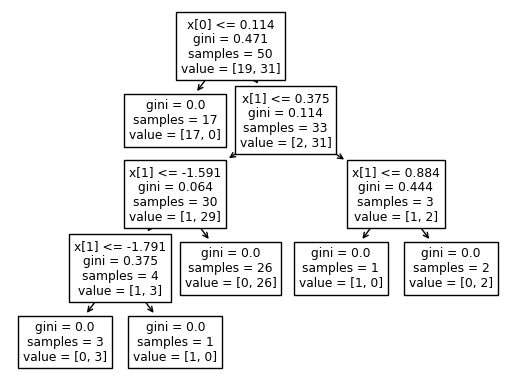

In [48]:
plot_tree(clf1)